In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('employee.csv', encoding = 'cp1252')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
df1 = pd.crosstab(df['Department'], df['BusinessTravel'], normalize = 'columns')
df1.style.format('{:.1%}')

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Department,,,
Human Resources,4.0%,4.0%,4.4%
Research & Development,64.7%,65.7%,65.4%
Sales,31.3%,30.3%,30.2%


[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%'),
 Text(0, 0, '60%'),
 Text(0, 0, '70%')]

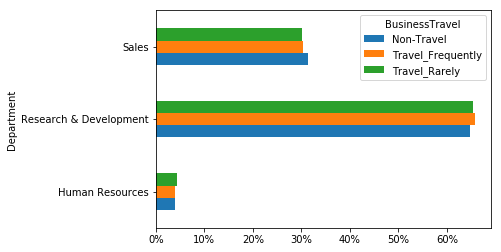

In [9]:
ax = df1.plot.barh()
vals=ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

In [24]:
df2 = df['JobSatisfaction'].value_counts(sort=False, normalize=True).to_frame()
df2['RelationshipSatisfaction'] = df['JobSatisfaction'].value_counts(sort=False, normalize=True)
df2['WorkLifeBalance'] = df['WorkLifeBalance'].value_counts(sort=False, normalize=True)
df2['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].value_counts(sort=False, normalize=True)
df2.index = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']
df2.style.format('{:.1%}')

,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,EnvironmentSatisfaction
Erittäin tyytymätön,19.7%,19.7%,5.4%,19.3%
Jokseenkin tyytymätön,19.0%,19.0%,23.4%,19.5%
Jokseenkin tyytyväinen,30.1%,30.1%,60.7%,30.8%
Erittäin tyytyväinen,31.2%,31.2%,10.4%,30.3%


[Text(0, 0, '0%'),
 Text(0, 0, '20%'),
 Text(0, 0, '40%'),
 Text(0, 0, '60%'),
 Text(0, 0, '80%'),
 Text(0, 0, '100%'),
 Text(0, 0, '120%')]

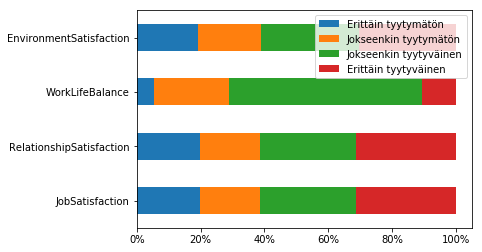

In [25]:
ax = df2.transpose().plot.barh(stacked = True)
vals=ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

In [43]:
bins = [0, 5000, 10000, 15000, 20000]
df['palkkaluokka'] = pd.cut(df['MonthlyIncome'], bins=bins)
df3 = pd.crosstab(df['palkkaluokka'], df['EducationField'], normalize='columns')
df3.style.format('{:.1%}')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
palkkaluokka,,,,,,
"(0, 5000]",51.9%,50.5%,32.1%,53.9%,63.4%,57.6%
"(5000, 10000]",25.9%,30.9%,48.4%,25.4%,22.0%,25.0%
"(10000, 15000]",0.0%,9.2%,11.3%,11.0%,6.1%,13.6%
"(15000, 20000]",22.2%,9.4%,8.2%,9.7%,8.5%,3.8%


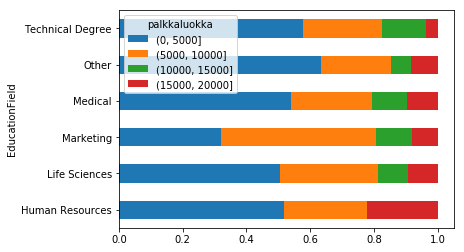

In [44]:
df3.transpose().plot.barh(stacked=True)